<a href="https://colab.research.google.com/github/MuhammadTalib/AI-Course-Examples/blob/master/Emotions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import nltk

Mounted at /content/drive


In [ ]:
!pip install trax

     |████████████████████████████████| 634kB 4.0MB/s 
     |████████████████████████████████| 153kB 14.4MB/s 
     |████████████████████████████████| 4.3MB 20.2MB/s 
     |████████████████████████████████| 1.2MB 39.1MB/s 
     |████████████████████████████████| 256kB 27.2MB/s 
     |████████████████████████████████| 3.9MB 40.1MB/s 
     |████████████████████████████████| 2.3MB 39.2MB/s 
     |████████████████████████████████| 368kB 37.4MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 3.3MB 37.6MB/s 
     |████████████████████████████████| 901kB 22.5MB/s 


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import trax
import string
import os
import random as rnd
from trax import layers as tl
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
sns.set()

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/EmotionsDataset/train.txt",names=["sentence"])
val_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/EmotionsDataset/val.txt",names=["sentence"])

In [ ]:
data["sentiment"] = data.apply(lambda x: (x["sentence"].split(";")[1]),axis=1)
data["sentence"] = data.apply(lambda x: (x["sentence"].split(";")[0]),axis=1)

val_data["sentiment"] = val_data.apply(lambda x: (x["sentence"].split(";")[1]),axis=1)
val_data["sentence"] = val_data.apply(lambda x: (x["sentence"].split(";")[0]),axis=1)

In [ ]:
data["sentiment"] = data["sentiment"].map({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
val_data["sentiment"] = val_data["sentiment"].map({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:
data["sentiment"]

0        3
1        3
2        1
3        2
4        1
        ..
15995    3
15996    3
15997    0
15998    1
15999    3
Name: sentiment, Length: 16000, dtype: int64

In [ ]:
val_data.head()

,sentence,sentiment
0,im feeling quite sad and sorry for myself but ...,3
1,i feel like i am still looking at a blank canv...,3
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,1
4,i can have for a treat or if i am feeling festive,0


In [ ]:
data['sentiment'].value_counts()

0    5362
3    4666
1    2159
4    1937
2    1304
5     572
Name: sentiment, dtype: int64

In [ ]:
def process_sentence(sentence):
    sentence_tokens = word_tokenize(sentence)
    sentences_clean = []
    stemmer = PorterStemmer()
    for word in sentence_tokens:
        if (word not in stopwords.words('english') and word not in string.punctuation):
            stem_word = stemmer.stem(word) # stemming word
            sentences_clean.append(stem_word)
    return sentences_clean

In [ ]:
process_sentence("im grabbing a minute to post i feel greedy wrong")

['im', 'grab', 'minut', 'post', 'feel', 'greedi', 'wrong']

In [ ]:
vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 

for i in range(0,len(data)): 
    sent = data['sentence'][i]
    processed_sent = process_sentence(sent)
    for word in processed_sent:
        if word not in vocab: 
            vocab[word] = len(vocab)
    
print("Total words in vocab are",len(vocab))
display(vocab)

Total words in vocab are 10378


{'__PAD__': 0,
 '__</e>__': 1,
 '__UNK__': 2,
 'didnt': 3,
 'feel': 4,
 'humili': 5,
 'go': 6,
 'hopeless': 7,
 'damn': 8,
 'hope': 9,
 'around': 10,
 'someon': 11,
 'care': 12,
 'awak': 13,
 'im': 14,
 'grab': 15,
 'minut': 16,
 'post': 17,
 'greedi': 18,
 'wrong': 19,
 'ever': 20,
 'nostalg': 21,
 'fireplac': 22,
 'know': 23,
 'still': 24,
 'properti': 25,
 'grouchi': 26,
 'ive': 27,
 'littl': 28,
 'burden': 29,
 'late': 30,
 'wasnt': 31,
 'sure': 32,
 'take': 33,
 'milligram': 34,
 'time': 35,
 'recommend': 36,
 'amount': 37,
 'fallen': 38,
 'asleep': 39,
 'lot': 40,
 'faster': 41,
 'also': 42,
 'like': 43,
 'funni': 44,
 'confus': 45,
 'life': 46,
 'teenag': 47,
 'jade': 48,
 'year': 49,
 'old': 50,
 'man': 51,
 'petrona': 52,
 'perform': 53,
 'well': 54,
 'made': 55,
 'huge': 56,
 'profit': 57,
 'romant': 58,
 'make': 59,
 'suffer': 60,
 'see': 61,
 'mean': 62,
 'someth': 63,
 'run': 64,
 'divin': 65,
 'experi': 66,
 'expect': 67,
 'type': 68,
 'spiritu': 69,
 'encount': 70,
 'thi

In [ ]:
def sent_to_tensor(sent, vocab_dict, unk_token='__UNK__', verbose=False):
    
    word_l = process_sentence(sent)
    
    if verbose:
        print("List of words from the processed tweet:")
        print(word_l)
        
    tensor_l = []
    
    unk_ID = vocab_dict[unk_token]
    
    if verbose:
        print(f"The unique integer ID for the unk_token is {unk_ID}")
        
    for word in word_l:
        word_ID = vocab_dict[word] if word in vocab_dict else unk_ID
        tensor_l.append(word_ID) 
    
    return tensor_l

In [ ]:
sent_to_tensor("im grabbing a minute to post i feel greedy wrong",vocab,verbose=True)

List of words from the processed tweet:
['im', 'grab', 'minut', 'post', 'feel', 'greedi', 'wrong']
The unique integer ID for the unk_token is 2


[14, 15, 16, 17, 4, 18, 19]

In [ ]:
def data_generator(data, batch_size, loop, vocab_dict, shuffle=False):
    index_lines = list(range(0,len(data)))
    
    if shuffle:
        rnd.shuffle(index_lines)
        
    stop = False
    index = 0
    data_len = len(data)
    while not stop:  

        batch = []
        targets = []
        for i in range(batch_size):
      
            if index >= data_len:
              stop = True;
              break;
            sent = data['sentence'][index_lines[index]]
            target = data['sentiment'][index_lines[index]]
            # t = data['sentiment'][index_lines[index]]
            # target[t]=1#data['sentiment'][index_lines[index]]
            tensor = sent_to_tensor(sent, vocab_dict)
            batch.append(tensor)
            targets.append(target)
            index = index + 1
            



        if stop:
            break;

        max_len = max([len(t) for t in batch]) 
        
        tensor_pad_l = []
        for tensor in batch:
            n_pad = max_len - len(tensor)
            pad_l = [0]*n_pad
            tensor_pad = tensor + pad_l
            tensor_pad_l.append(tensor_pad)

        inputs = np.array(tensor_pad_l)
        targets = np.array(targets)

        example_weights = np.ones_like([1]*len(targets))
        
        yield inputs, targets, example_weights

In [ ]:
val_data

,sentence,sentiment
0,im feeling quite sad and sorry for myself but ...,3
1,i feel like i am still looking at a blank canv...,3
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,1
4,i can have for a treat or if i am feeling festive,0
...,...,...
1995,im having ssa examination tomorrow in the morn...,3
1996,i constantly worry about their fight against n...,0
1997,i feel its important to share this info for th...,0
1998,i truly feel that if you are passionate enough...,0


In [ ]:
def train_generator(batch_size, shuffle = False):
    return data_generator(data, batch_size, True, vocab, shuffle)

def val_generator(batch_size, shuffle = False):
    return data_generator(val_data, batch_size, True, vocab, shuffle)


In [ ]:
next(val_generator(4, shuffle=True))

(array([[ 739,    4,   99,   37,   35, 1679,  647,  899, 1279, 1364, 1516,
            0,    0],
        [   4, 1083,   12,  292, 5685,   54,    0,    0,    0,    0,    0,
            0,    0],
        [  14,   68,  169,  352,  128,    4, 1740,  890, 2503, 3187,  206,
           59, 1573],
        [ 340,  179,  674,    4, 2229,  346,  228,    0,    0,    0,    0,
            0,    0]]), array([3, 2, 3, 0]), array([1, 1, 1, 1]))

In [ ]:
def classifier(vocab_size=len(vocab), embedding_dim=256, output_dim=6, mode='train'):
        
    embed_layer = tl.Embedding( vocab_size=vocab_size, d_feature=embedding_dim)
    mean_layer = tl.Mean(axis=1)
    
    dense_output_layer = tl.Dense(output_dim)

    log_softmax_layer = tl.LogSoftmax()
    
    model = tl.Serial(
      embed_layer, # embedding layer
      mean_layer, # mean layer
      dense_output_layer, # dense output layer 
      log_softmax_layer  # log softmax layer
    )
    
    return model

In [ ]:
from trax.supervised import training

batch_size = 16
rnd.seed(271)

train_task = training.TrainTask(
    labeled_data=train_generator(batch_size=batch_size, shuffle=True),
    loss_layer=tl.CrossEntropyLoss(),
    optimizer=trax.optimizers.Adam(0.01),
    n_steps_per_checkpoint=10,
)

eval_task = training.EvalTask(
    labeled_data=val_generator(batch_size=batch_size, shuffle=True),
    metrics=[tl.CrossEntropyLoss(), tl.Accuracy()],
)

model = classifier()

In [ ]:
model

Serial[
  Embedding_10378_256
  Mean
  Dense_6
  LogSoftmax
]

In [ ]:
def train_model(classifier, train_task, eval_task, n_steps, output_dir):
    training_loop = training.Loop(
                                classifier, # The learning model
                                train_task, # The training task
                                eval_tasks = eval_task, # The evaluation task
                                output_dir = output_dir) # The output directory

    training_loop.run(n_steps = n_steps)
    return training_loop

In [ ]:
output_dir = '~/model/'
output_dir_expand = os.path.expanduser(output_dir)
print(output_dir_expand)

/root/model/


In [ ]:
train_task

In [ ]:
# training_loop = None
# train_model=None
# train_task=None
# eval_task=None

In [ ]:
training_loop = train_model(model, train_task, eval_task, 50, output_dir_expand)

/usr/local/lib/python3.7/dist-packages/jax/lib/xla_bridge.py:304: UserWarning: jax.host_id has been renamed to jax.process_index. This alias will eventually be removed; please update your code.
  "jax.host_id has been renamed to jax.process_index. This alias "
/usr/local/lib/python3.7/dist-packages/jax/lib/xla_bridge.py:317: UserWarning: jax.host_count has been renamed to jax.process_count. This alias will eventually be removed; please update your code.
  "jax.host_count has been renamed to jax.process_count. This alias "



Step    260: Ran 10 train steps in 9.90 secs
Step    260: train CrossEntropyLoss |  0.69684011
Step    260: eval  CrossEntropyLoss |  1.22330570
Step    260: eval          Accuracy |  0.50000000

Step    270: Ran 10 train steps in 5.40 secs
Step    270: train CrossEntropyLoss |  0.63721842
Step    270: eval  CrossEntropyLoss |  0.78763801
Step    270: eval          Accuracy |  0.75000000

Step    280: Ran 10 train steps in 3.59 secs
Step    280: train CrossEntropyLoss |  0.53656149
Step    280: eval  CrossEntropyLoss |  1.27938557
Step    280: eval          Accuracy |  0.56250000

Step    290: Ran 10 train steps in 5.92 secs
Step    290: train CrossEntropyLoss |  0.69653559
Step    290: eval  CrossEntropyLoss |  1.06231701
Step    290: eval          Accuracy |  0.75000000

Step    300: Ran 10 train steps in 2.59 secs
Step    300: train CrossEntropyLoss |  0.63932592
Step    300: eval  CrossEntropyLoss |  1.03542447
Step    300: eval          Accuracy |  0.62500000


In [ ]:
%matplotlib notebook
%matplotlib inline

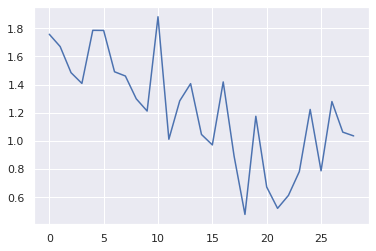

In [ ]:
frame = pd.DataFrame(training_loop.history.get("eval", "metrics/CrossEntropyLoss"), columns="Batch CrossEntropyLoss".split())
plt.plot(frame["CrossEntropyLoss"])

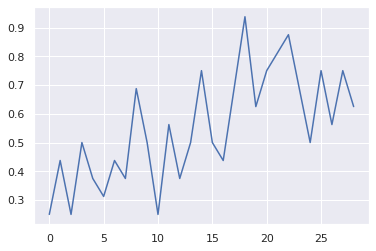

In [ ]:
frame = pd.DataFrame(training_loop.history.get("eval", "metrics/Accuracy"), columns="Batch Accuracy".split())
plt.plot(frame["Accuracy"])

In [ ]:
def compute_accuracy(preds, y, y_weights):

    preds = np.array([j for i in (preds == preds.max(axis=1)[:,None]).astype(int) for j in range(0,len(i)) if i[j]==1])

    # is_pos =  preds[:, 1] > preds[:, 0] 

    is_correct = preds.astype(np.int32)
    correct = is_correct == y

    sum_weights = np.sum(y_weights)
    
    correct_float = correct.astype(np.float32)
    print("correct_float", correct_float)

    weighted_correct_float = correct_float * y_weights
    print("weighted_correct_float", weighted_correct_float)

    weighted_num_correct = np.sum(weighted_correct_float)
 
    accuracy = weighted_num_correct / sum_weights

    return accuracy, weighted_num_correct, sum_weights

In [ ]:
def test_model(generator, model):
    
    accuracy = 0.
    total_num_correct = 0
    total_num_pred = 0
    
    for batch in generator: 
        
        inputs = batch[0]
        targets = batch[1]
        example_weight = batch[2]

        pred = model(inputs)
        
        batch_accuracy, batch_num_correct, batch_num_pred = compute_accuracy(
            pred, 
            targets, 
            example_weight)
        print("batch_accuracy, batch_num_correct, batch_num_pred", batch_accuracy, batch_num_correct, batch_num_pred)
        
        total_num_correct += batch_num_correct
        
        total_num_pred += batch_num_pred

    accuracy = total_num_correct / total_num_pred
    
    return accuracy

In [ ]:
model = training_loop.eval_model
accuracy = test_model(val_generator(16), model)
accuracy

correct_float [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
weighted_correct_float [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
batch_accuracy, batch_num_correct, batch_num_pred 0.9375 15.0 16
correct_float [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]
weighted_correct_float [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]
batch_accuracy, batch_num_correct, batch_num_pred 0.6875 11.0 16
correct_float [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
weighted_correct_float [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
batch_accuracy, batch_num_correct, batch_num_pred 0.75 12.0 16
correct_float [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
weighted_correct_float [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
batch_accuracy, batch_num_correct, batch_num_pred 0.875 14.0 16
correct_float [1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
weighted_correct_float [1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
batch_accuracy, batch_num_correct, batch_num_pred 0.6875 1

0.7155

In [ ]:
sentence = "i feel like a faithful servant"
output = predict(sentence)
output

(DeviceArray([[5.66585732e+00, 1.68471947e+01, 3.46946716e-03,
               1.54994755e+01, 1.52864580e+01, 1.36058655e+01]],            dtype=float32),
 DeviceArray(0.25166988, dtype=float32),
 DeviceArray(2, dtype=int32))

In [ ]:
##.map({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})